<a href="https://colab.research.google.com/github/NabilahSharfina/CELERATES-ACCELERATION-PROGRAM/blob/main/Final_Project_Credit_Risk_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>FINAL PROJECT</bold></center><h1>
<h1><center><bold>BIG DATA AND BUSINESS INTELLIGENCE</bold></center><h1>
<h1><center><bold>KAMPUS MERDEKA</bold></center><h1>
<h2><center><bold>CREDIT RISK ANALYSIS</bold></center><h2>

---



# **WEEK 2 - PREDICT DATA & MODELLING**

## Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [1]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

## 2.1 EDA

In [2]:
df = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA /Celerates Acceleration Program /FINAL PROJECT/Dataset/Demo/credit_risk.csv')
df

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue,CreditStatus,Age_Bins
0,0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
1,1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,-1,0,lansia
2,2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
3,3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,...,1,0,1,1,1,52,8,0,0,lansia
4,4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,...,1,0,0,0,1,62,1001,0,0,lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,36252,5149158,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,...,1,1,0,0,2,30,10,2,1,dewasa
36253,36253,5149190,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,...,1,0,1,1,3,27,1,5,1,dewasa
36254,36254,5149729,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,...,1,0,0,0,2,52,5,2,1,lansia
36255,36255,5149828,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,...,1,0,0,0,2,48,7,5,1,lansia


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36257 non-null  int64  
 1   Id_customer          36257 non-null  int64  
 2   JenisKelamin         36257 non-null  object 
 3   KepemilikanMobil     36257 non-null  object 
 4   KepemilikanProperti  36257 non-null  object 
 5   JmlAnak              36257 non-null  int64  
 6   Pendapatan           36257 non-null  float64
 7   TipePendapatan       36257 non-null  object 
 8   TingkatPendidikan    36257 non-null  object 
 9   StatusKeluarga       36257 non-null  object 
 10  TipeRumah            36257 non-null  object 
 11  FlagMobile           36257 non-null  int64  
 12  FlagWorkPhone        36257 non-null  int64  
 13  FlagPhone            36257 non-null  int64  
 14  Email                36257 non-null  int64  
 15  JmlAnggotaKeluarga   36257 non-null 

### 2.1.1 Missing Value

In [4]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

Unnamed: 0             0
Id_customer            0
JenisKelamin           0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
JmlAnggotaKeluarga     0
Usia                   0
Pengalaman             0
Overdue                0
CreditStatus           0
Age_Bins               0
dtype: int64

### 2.1.2 Unique Value

In [5]:
# Melihat data unique dari setiap fitur dalam tabel
for feature in df.columns:
    print(
        f"- Jumlah unique value pada kolom `{feature}`:",
        df[feature].nunique()
    )

- Jumlah unique value pada kolom `Unnamed: 0`: 36257
- Jumlah unique value pada kolom `Id_customer`: 36257
- Jumlah unique value pada kolom `JenisKelamin`: 2
- Jumlah unique value pada kolom `KepemilikanMobil`: 2
- Jumlah unique value pada kolom `KepemilikanProperti`: 2
- Jumlah unique value pada kolom `JmlAnak`: 9
- Jumlah unique value pada kolom `Pendapatan`: 265
- Jumlah unique value pada kolom `TipePendapatan`: 5
- Jumlah unique value pada kolom `TingkatPendidikan`: 3
- Jumlah unique value pada kolom `StatusKeluarga`: 3
- Jumlah unique value pada kolom `TipeRumah`: 5
- Jumlah unique value pada kolom `FlagMobile`: 1
- Jumlah unique value pada kolom `FlagWorkPhone`: 2
- Jumlah unique value pada kolom `FlagPhone`: 2
- Jumlah unique value pada kolom `Email`: 2
- Jumlah unique value pada kolom `JmlAnggotaKeluarga`: 10
- Jumlah unique value pada kolom `Usia`: 49
- Jumlah unique value pada kolom `Pengalaman`: 45
- Jumlah unique value pada kolom `Overdue`: 7
- Jumlah unique value pada kolo

### 2.1.3 Duplicate Data

In [6]:
# Mengecek baris yang duplikat
df[df['Id_customer'].duplicated()]

,Unnamed: 0,Id_customer,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,...,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Usia,Pengalaman,Overdue,CreditStatus,Age_Bins


### 2.1.4 Data Cleaning

In [4]:
# Menghapus kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0', 'Id_customer', 'FlagMobile', 'FlagWorkPhone', 'Email', 'Pengalaman', 'Overdue'])
df

,JenisKelamin,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagPhone,JmlAnggotaKeluarga,Usia,CreditStatus,Age_Bins
0,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,52,0,lansia
1,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,52,0,lansia
2,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,52,0,lansia
3,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,1,52,0,lansia
4,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,0,1,62,0,lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36252,Laki-laki,Ya,Ya,0,247500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,30,1,dewasa
36253,Laki-laki,Ya,Tidak,1,450000.0,Bekerja,Post Graduate,Menikah,Rumah Pribadi,1,3,27,1,dewasa
36254,Laki-laki,Ya,Ya,0,90000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,52,1,lansia
36255,Laki-laki,Ya,Ya,0,315000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,0,2,48,1,lansia


In [9]:
# Rename column name
df.rename(columns={'Age_Bins': 'KategoriUsia'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36257 entries, 0 to 36256
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JenisKelamin         36257 non-null  object 
 1   KepemilikanMobil     36257 non-null  object 
 2   KepemilikanProperti  36257 non-null  object 
 3   JmlAnak              36257 non-null  int64  
 4   Pendapatan           36257 non-null  float64
 5   TipePendapatan       36257 non-null  object 
 6   TingkatPendidikan    36257 non-null  object 
 7   StatusKeluarga       36257 non-null  object 
 8   TipeRumah            36257 non-null  object 
 9   FlagPhone            36257 non-null  int64  
 10  JmlAnggotaKeluarga   36257 non-null  int64  
 11  Usia                 36257 non-null  int64  
 12  CreditStatus         36257 non-null  int64  
 13  KategoriUsia         36257 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 3.9+ MB


### 2.1.5 Feature Category

In [11]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

In [12]:
print("Numerical features:")
numerical_features

Numerical features:


['JmlAnak',
 'Pendapatan',
 'FlagPhone',
 'JmlAnggotaKeluarga',
 'Usia',
 'CreditStatus']

In [13]:
print("Categorical features:")
categorical_features

Categorical features:


['JenisKelamin',
 'KepemilikanMobil',
 'KepemilikanProperti',
 'TipePendapatan',
 'TingkatPendidikan',
 'StatusKeluarga',
 'TipeRumah',
 'KategoriUsia']

### 2.1.6 Statistic Summary

In [17]:
# Memahami karakteristik data melalui fitur-fitur numerik dengan function describe(). T=Transpose
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
JmlAnak,36257.0,0.430427,0.742474,0.0,0.0,0.0,1.0,19.0
Pendapatan,36257.0,186625.534421,101548.649430,27000.0,121500.0,157500.0,225000.0,1575000.0
FlagPhone,36257.0,0.294812,0.455965,0.0,0.0,0.0,1.0,1.0
JmlAnggotaKeluarga,36257.0,2.198720,0.911781,1.0,2.0,2.0,3.0,20.0
Usia,36257.0,43.770720,11.521564,21.0,34.0,43.0,53.0,69.0
CreditStatus,36257.0,0.116226,0.320500,0.0,0.0,0.0,0.0,1.0


In [18]:
# Memahami karakteristik data melalui fitur-fitur kategoris dengan function describe()
df[categorical_features].describe().T

,count,unique,top,freq
JenisKelamin,36257,2,Perempuan,24279
KepemilikanMobil,36257,2,Tidak,22476
KepemilikanProperti,36257,2,Ya,24367
TipePendapatan,36257,5,Bekerja,18708
TingkatPendidikan,36257,3,Graduate,26046
StatusKeluarga,36257,3,Menikah,27845
TipeRumah,36257,5,Rumah Pribadi,32367
KategoriUsia,36257,4,dewasa,19853


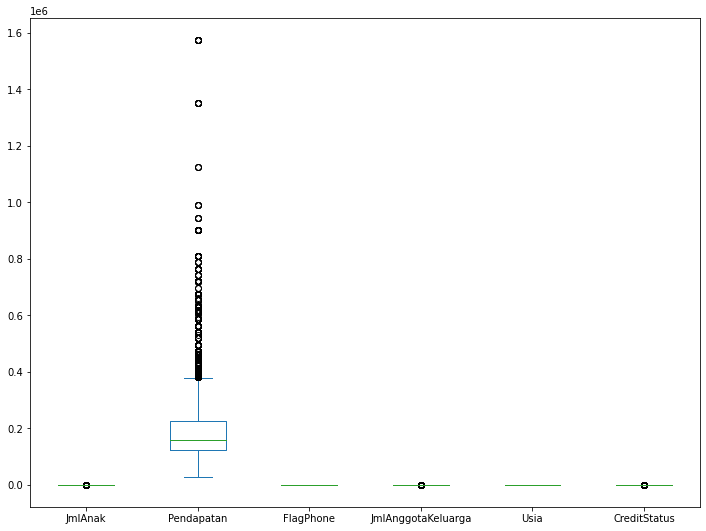

In [16]:
# Visualisasikan fitur-fitur numerik ke Boxplot untuk melihat bagaimana data tersebar
df[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

> **Insights:** 

> Dari visualisasi box plot di atas:
* Semua distribusi `BMI`, `PhysicalHealth`, `MentalHealth`, `SleepTime` terlihat right-skewed
* Meski begitu, nilai rata-rata dan median `BMI` dan `SleepTime` cenderung sama

> Selain menggnakan boxplot seperti di atas, kita juga bisa menggunakan violin plot seperti di bawah ini untuk mengetahui bentuk kurva distribusi masing-masing fitur dengan lebih jelas.

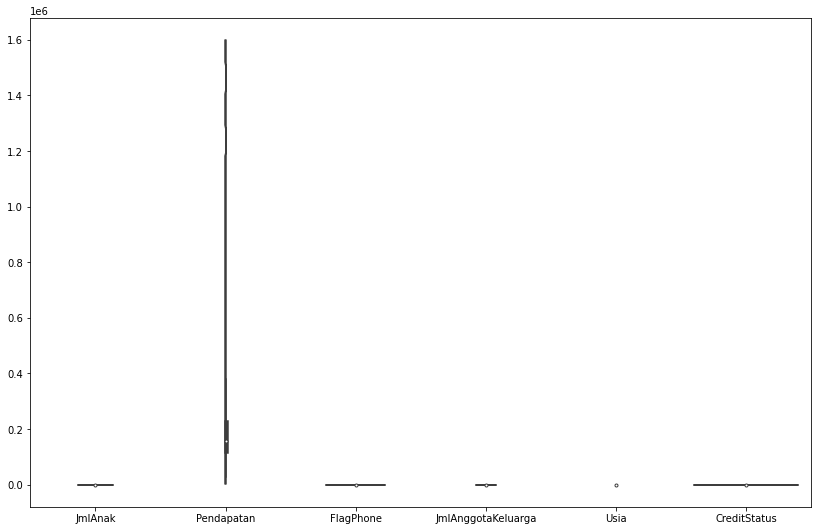

In [19]:
# Visualisasikan fitur-fitur numerik ke Violin Plot untuk melihat bentuk kurva distribusi data
plt.figure(figsize=(14, 9))
sns.violinplot(data=df[numerical_features])
plt.grid(False)
plt.show()

> Berbeda dengan fitur numerik, ringkasan statistik untuk fitur-fitur kategorik terdiri dari jumlah baris pada data, jumlah nilai unik, nilai yang paling sering muncul (mode), dan frekuensinya.

### 2.1.7 Data Correlation

In [20]:
# Melihat hubungan dari fitur numerik menggunakan correlation 
df.corr()

,JmlAnak,Pendapatan,FlagPhone,JmlAnggotaKeluarga,Usia,CreditStatus
JmlAnak,1.000000,0.033966,-0.016770,0.889197,-0.338590,0.011496
Pendapatan,0.033966,1.000000,0.018073,0.024134,-0.068255,0.023706
FlagPhone,-0.016770,0.018073,1.000000,-0.004652,0.028739,-0.006858
JmlAnggotaKeluarga,0.889197,0.024134,-0.004652,1.000000,-0.303523,0.009117
Usia,-0.338590,-0.068255,0.028739,-0.303523,1.000000,-0.029383
CreditStatus,0.011496,0.023706,-0.006858,0.009117,-0.029383,1.000000


> Untuk lebih jelas dalam mengetahui pasangan fitur mana yang memiliki koefisien korelasi yang kuat (mendekati 1 atau mendekati -1), kita bisa buat plot heatmap berikut.

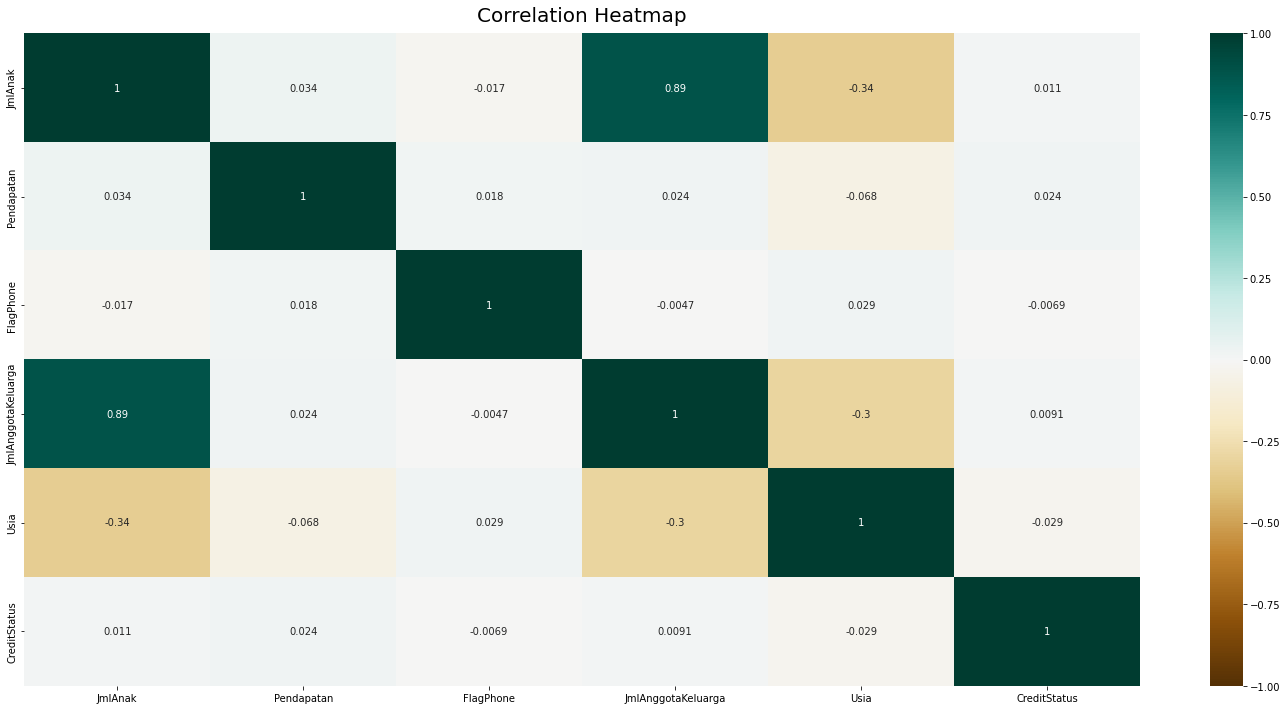

In [21]:
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

### 2.1.8 Handling Outlier

#### 2.1.8.1 Pendapatan

In [33]:
# Menghitung IQR, lower whisker dan upper whisker
Q1 = df['Pendapatan'].quantile(0.25)
Q3 = df['Pendapatan'].quantile(0.75)

IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

121500.0
225000.0
103500.0
-33750.0 380250.0


In [34]:
# Mengubah nilai pencilan 'Pendapatan'
df = df[df['Pendapatan'] < Upper_Whisker]

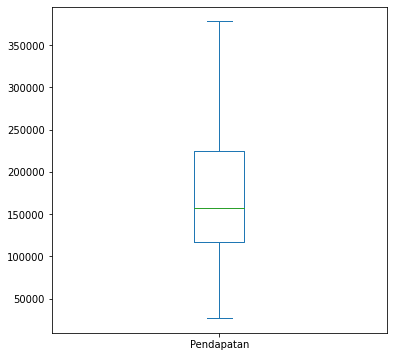

In [35]:
# Visualisasi outlier di kolom 'Pendapatan'
df['Pendapatan'].plot(kind="box", figsize=(6, 6))
plt.grid(False)
plt.show()

#### 2.1.8.2 Jumlah Anak

In [36]:
# Menghitung IQR, lower whisker dan upper whisker
Q1 = df['JmlAnak'].quantile(0.25)
Q3 = df['JmlAnak'].quantile(0.75)

IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
1.0
1.0
-1.5 2.5


In [43]:
# Mengubah nilai pencilan 'JmlAnak'
df = df[df['JmlAnak'] > Lower_Whisker]

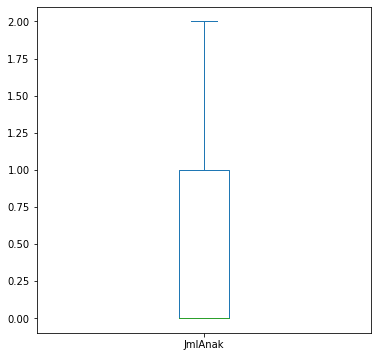

In [44]:
# Visualisasi outlier di kolom 'JmlAnak'
df['JmlAnak'].plot(kind="box", figsize=(6, 6))
plt.grid(False)
plt.show()

#### 2.1.8.3 Jumlah Anggota Keluarga

In [46]:
# Menghitung IQR, lower whisker dan upper whisker
Q1 = df['JmlAnggotaKeluarga'].quantile(0.25)
Q3 = df['JmlAnggotaKeluarga'].quantile(0.75)

IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.0
3.0
1.0
0.5 4.5


In [50]:
# Mengubah nilai pencilan 'JmlAnggotaKeluarga'
df = df[df['JmlAnggotaKeluarga'] < Upper_Whisker]

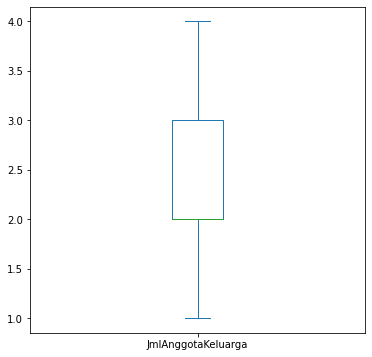

In [51]:
# Visualisasi outlier di kolom 'JmlAnggotaKeluarga'
df['JmlAnggotaKeluarga'].plot(kind="box", figsize=(6, 6))
plt.grid(False)
plt.show()

### 2.1.9 Encoding

In [ ]:
# One hot encoder
encoder = OneHotEncoder()
encoder.fit(df.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(df.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

X_preprocessed = pd.concat([df.select_dtypes(exclude="object"), X_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)

X_scaled.head()

### 2.1.10 Visualization

In [24]:
# Melihat type kolom pada setiap dataset
df.dtypes

JenisKelamin            object
KepemilikanMobil        object
KepemilikanProperti     object
JmlAnak                  int64
Pendapatan             float64
TipePendapatan          object
TingkatPendidikan       object
StatusKeluarga          object
TipeRumah               object
FlagPhone                int64
JmlAnggotaKeluarga       int64
Usia                     int64
CreditStatus             int64
KategoriUsia            object
dtype: object

In [25]:
# Visualisasi kolom status untuk melihat jumlah data
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 3), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

MAIN_COLOR = ["#29B5BF"] 
OTHER_COLOR = ["#777777"]

#### 2.8.1 Jenis Kelamin

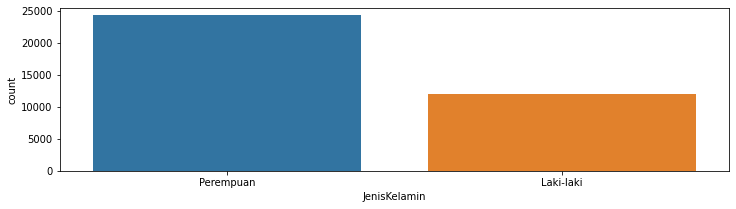

In [26]:
# Show visualization 'JenisKelamin'
plot_count(x="JenisKelamin", data=df)

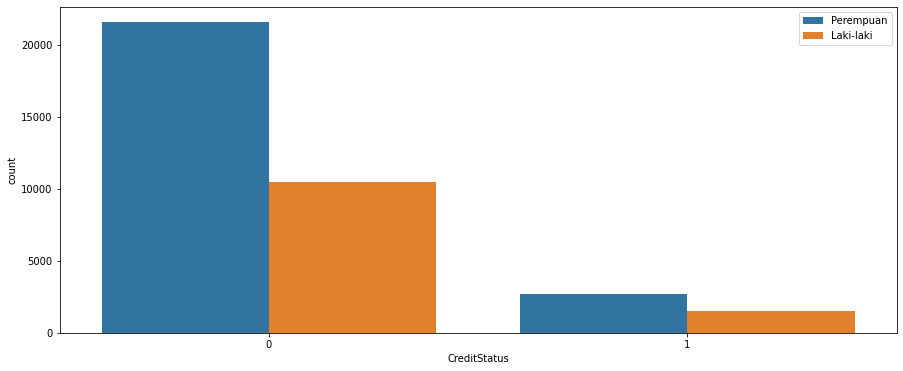

In [27]:
# Show visualization 'CreditStatus' terhadap 'JenisKelamin'
plot_count(x="CreditStatus", hue="JenisKelamin", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.8.2 Kepemilikan

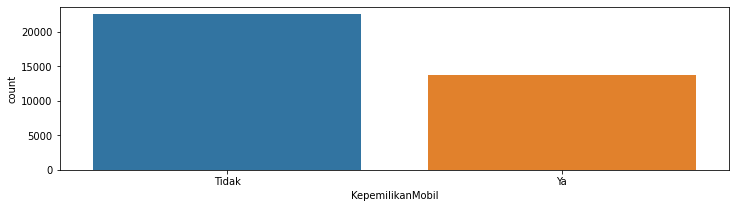

In [12]:
# Show visualization 'KepemilikanMobil'
plot_count(x="KepemilikanMobil", data=df)

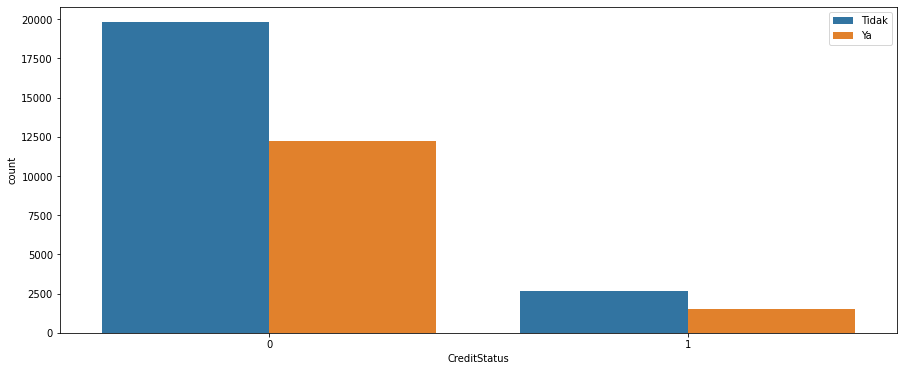

In [29]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanMobil'
plot_count(x="CreditStatus", hue="KepemilikanMobil", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

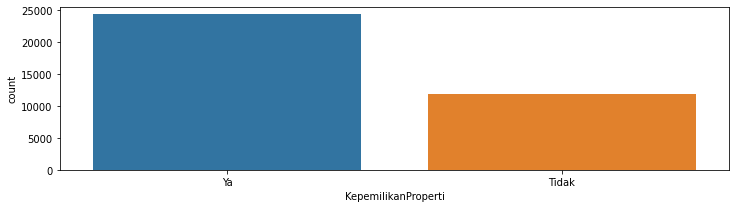

In [19]:
# Show visualization 'KepemilikanProperti'
plot_count(x="KepemilikanProperti", data=df)

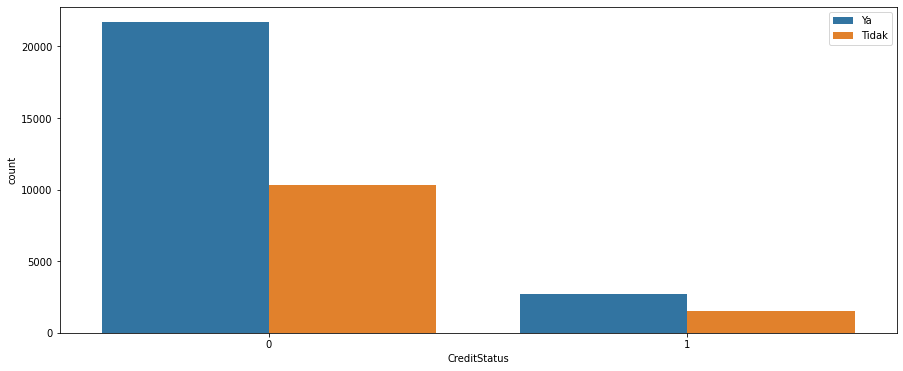

In [30]:
# Show visualization 'CreditStatus' terhadap 'KepemilikanProperti'
plot_count(x="CreditStatus", hue="KepemilikanProperti", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.8.3 Credit Status

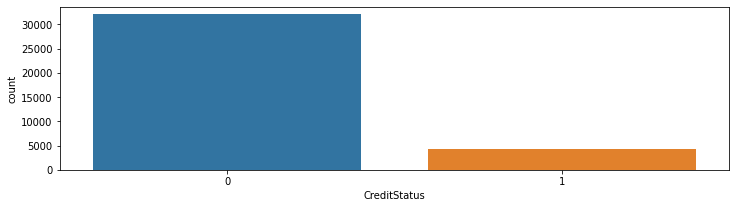

In [16]:
# Show visualization 'CreditStatus'
plot_count(x="CreditStatus", data=df)

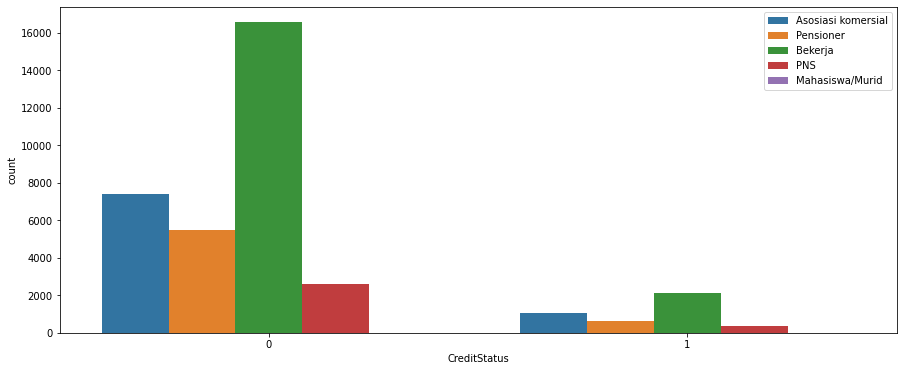

In [17]:
# Show visualization 'CreditStatus' terhadap 'TipePendapatan'
plot_count(x="CreditStatus", hue="TipePendapatan", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

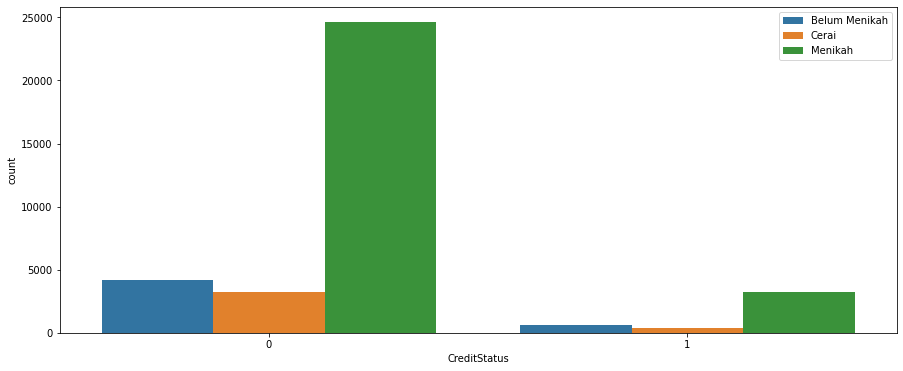

In [18]:
# Show visualization 'CreditStatus' terhadap 'StatusKeluarga'
plot_count(x="CreditStatus", hue="StatusKeluarga", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

#### 2.8.4 Kategori Usia

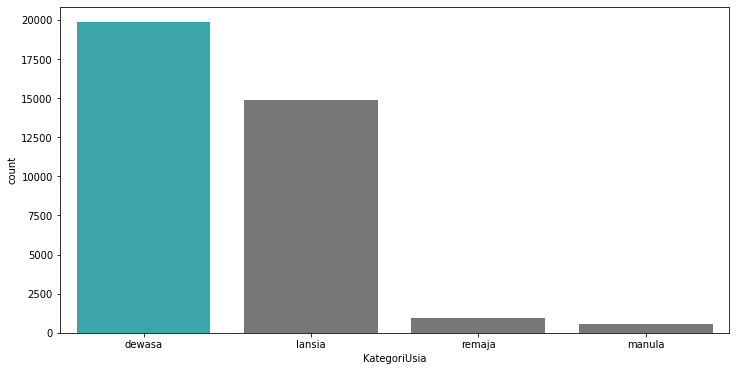

In [22]:
age_category = df.KategoriUsia.value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    x="KategoriUsia",
    data=df,
    order=age_category,
    palette=["#29B5BF"] + (len(age_category)-1)*["#777777"]
)
plt.grid(False)

plt.show()

> **Insights:** 

> * Dari visualisasi di atas, terlihat bahwa mayoritas adalah kategori **Dewasa**.
> * Lalu, bagaimana distribusi kategori umur pada masing-masing responden yang memiliki sakit jantung maupun tidak? Mari kita buat visualisasinya.

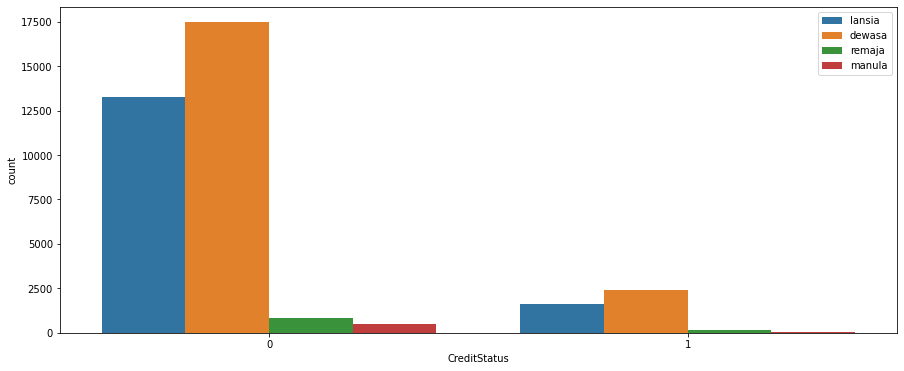

In [28]:
# Show visualization 'CreditStatus' terhadap 'KategoriUsia'
plot_count(x="CreditStatus", hue="KategoriUsia", data=df, figsize=(15, 6))
plt.legend(loc="upper right")
plt.show()

## 2.2 Modelling

### 2.2.1 Data Splitting

> Pada tahap ini, kita akan membagi dataset menjadi 3 set yaitu: 
> * **training**, 
> * **dev**, dan 
> * **test** set 

> Dengan proporsi **80% : 10% : 10%**